In [4]:
import pandas as pd

# Path to the file
file_path = "C:\\Users\\adler\\TP53_NEW\\sample_matrix.csv"

# Load the file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,studyID:sampleId,Any_Mutation,TP53,KRAS,PIK3CA,APC,CDKN2A,BRAF,ATM,MDM2,JAK1,CDK12,WT1,BRCA2,NTRK1,RET
0,msk_impact_2017:P-0000004-T01-IM3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,msk_impact_2017:P-0000015-T01-IM3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,msk_impact_2017:P-0000023-T01-IM3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,msk_impact_2017:P-0000024-T01-IM3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,msk_impact_2017:P-0000025-T02-IM5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# Compute descriptive statistics
descriptive_stats = data.describe()

# Display the statistics
print(descriptive_stats)

       Any_Mutation          TP53          KRAS        PIK3CA           APC  \
count  10945.000000  10945.000000  10945.000000  10945.000000  10945.000000   
mean       0.714299      0.424303      0.165007      0.129191      0.106533   
std        0.451768      0.494259      0.371204      0.335427      0.308532   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             CDKN2A          BRAF           ATM          MDM2          JAK1  \
count  10945.000000  10945.000000  10945.000000  10945.000000  10945.000000   
mean       0.121243      0.056830      0.051348      0.042211      0.020466   
std        0.326424      0.231527      0.220716    

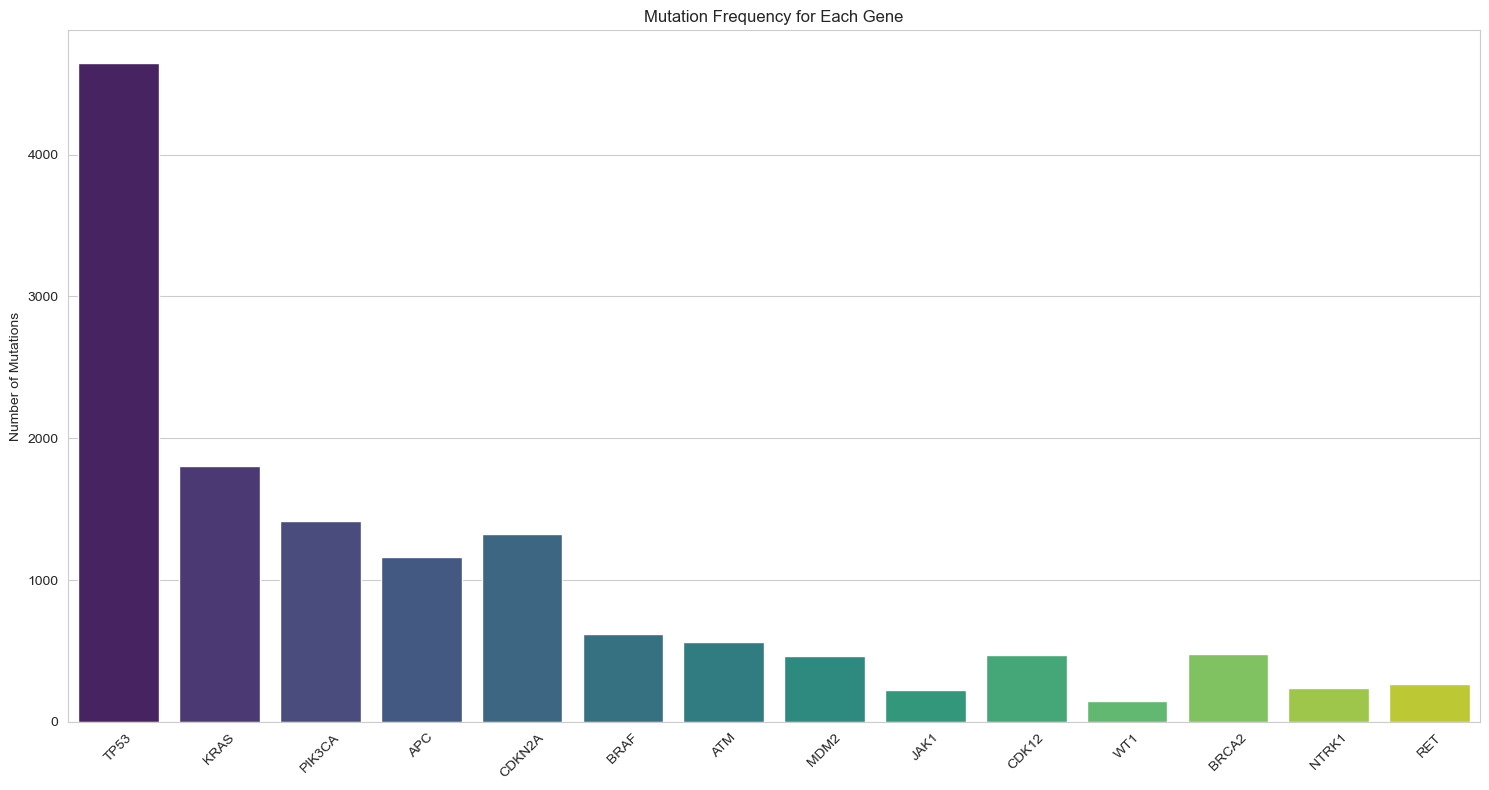

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Load the dataset
file_path = "C:\\Users\\adler\\TP53_NEW\\sample_matrix.csv"
data = pd.read_csv(file_path)

# Compute mutation frequency for each gene (excluding the 'Any_Mutation' and 'studyID:sampleId' columns)
mutation_frequencies = data.drop(columns=['Any_Mutation', 'studyID:sampleId']).sum()

# Plot the mutation frequencies
plt.figure(figsize=(15, 8))
sns.barplot(x=mutation_frequencies.index, y=mutation_frequencies.values, palette="viridis")
plt.title("Mutation Frequency for Each Gene")
plt.ylabel("Number of Mutations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
file_path = "C:\\Users\\adler\\TP53_NEW\\sample_matrix.csv"
data = pd.read_csv(file_path)

# List to store results of chi-squared tests
chi2_results = []

# Iterate through each pair of genes to test their association
genes = data.columns[2:]
for i in range(len(genes)):
    for j in range(i+1, len(genes)):
        gene1 = genes[i]
        gene2 = genes[j]
        
        # Create a contingency table
        contingency = pd.crosstab(data[gene1], data[gene2])
        
        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency)
        
        # Store the results
        chi2_results.append((gene1, gene2, chi2, p))

# Convert results to DataFrame for easier inspection
chi2_df = pd.DataFrame(chi2_results, columns=['Gene1', 'Gene2', 'Chi2 Statistic', 'p-value'])

# Display significant associations (considering p-value < 0.05)
significant_associations = chi2_df[chi2_df['p-value'] < 0.05].sort_values(by='p-value')



In [10]:
print(f"Number of significant associations: {len(significant_associations)}")


Number of significant associations: 62


In [11]:
print(significant_associations)


     Gene1  Gene2  Chi2 Statistic       p-value
14    KRAS    APC      368.874559  3.290323e-82
2     TP53    APC      298.828787  5.928446e-67
6     TP53   MDM2      136.638081  1.446937e-31
43     APC  BRCA2      131.910522  1.565173e-30
67     ATM  BRCA2       95.248274  1.679445e-22
..     ...    ...             ...           ...
48  CDKN2A   MDM2        7.248475  7.096126e-03
51  CDKN2A    WT1        6.060983  1.382007e-02
42     APC    WT1        5.660679  1.734940e-02
87     WT1    RET        4.580403  3.233960e-02
49  CDKN2A   JAK1        4.574978  3.244216e-02

[62 rows x 4 columns]


In [12]:
# Filter associations involving TP53
tp53_associations = significant_associations[
    (significant_associations['Gene1'] == 'TP53') | 
    (significant_associations['Gene2'] == 'TP53')
]

# Display TP53 associations
print(tp53_associations)


   Gene1   Gene2  Chi2 Statistic       p-value
2   TP53     APC      298.828787  5.928446e-67
6   TP53    MDM2      136.638081  1.446937e-31
0   TP53    KRAS       72.312439  1.836859e-17
8   TP53   CDK12       52.667282  3.951187e-13
10  TP53   BRCA2       23.438486  1.289724e-06
3   TP53  CDKN2A       22.160113  2.508312e-06
11  TP53   NTRK1       21.573750  3.404800e-06
12  TP53     RET       12.892266  3.299427e-04


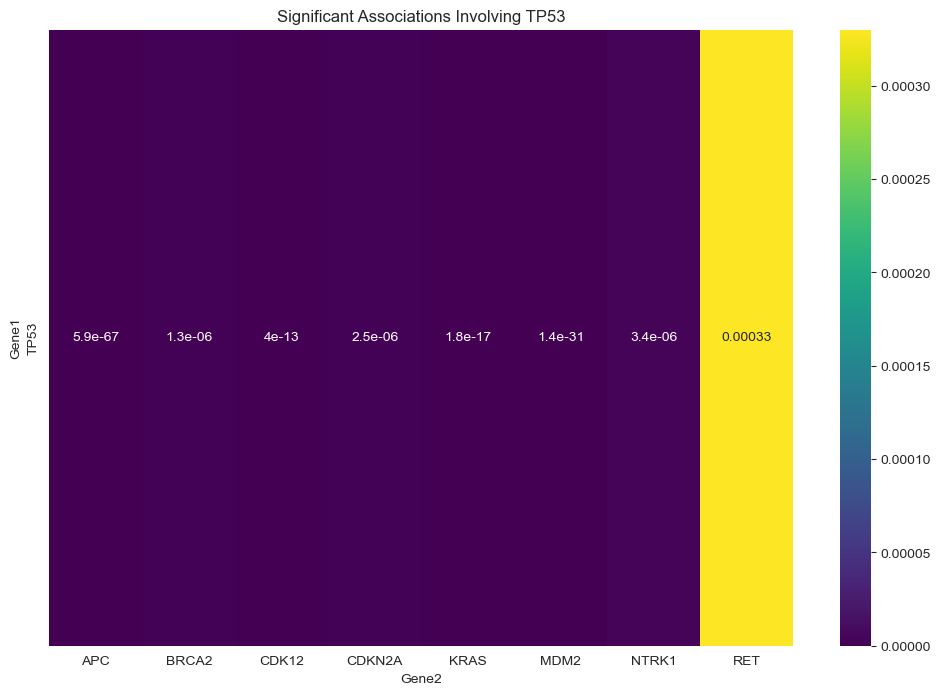

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a matrix to represent associations involving TP53
tp53_association_matrix = pd.pivot_table(tp53_associations, 
                                         values='p-value', 
                                         index='Gene1', 
                                         columns='Gene2')

# Set up the heatmap with proper annotation formatting
plt.figure(figsize=(12, 8))
sns.heatmap(tp53_association_matrix, cmap='viridis', annot=True, fmt=".2g")
plt.title("Significant Associations Involving TP53")
plt.show()


In [17]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
missing_values


studyID:sampleId    0
Any_Mutation        0
TP53                0
KRAS                0
PIK3CA              0
APC                 0
CDKN2A              0
BRAF                0
ATM                 0
MDM2                0
JAK1                0
CDK12               0
WT1                 0
BRCA2               0
NTRK1               0
RET                 0
dtype: int64

In [18]:
# Count the occurrences of each unique studyID:sampleId
duplicated_counts = data['studyID:sampleId'].value_counts()

# Filter studyID:sampleId that appear more than once (duplicated entries)
duplicated_ids = duplicated_counts[duplicated_counts > 1]

# Display the count of duplicated studyID:sampleId and the list of duplicated studyID:sampleId
print(f"Number of duplicated studyID:sampleId: {len(duplicated_ids)}")
print("List of duplicated studyID:sampleId:")
print(duplicated_ids)


Number of duplicated studyID:sampleId: 0
List of duplicated studyID:sampleId:
Series([], Name: studyID:sampleId, dtype: int64)


In [19]:
# Count the occurrences of each unique studyID:sampleId
duplicated_counts = data['studyID:sampleId'].value_counts()

# Filter studyID:sampleId that appear more than once (duplicated entries)
duplicated_ids = duplicated_counts[duplicated_counts > 1]

# Display the count of duplicated studyID:sampleId and the list of duplicated studyID:sampleId
print(f"Number of duplicated studyID:sampleId entries: {len(duplicated_ids)}")
print("List of duplicated studyID:sampleId entries:")
print(duplicated_ids)


Number of duplicated studyID:sampleId entries: 0
List of duplicated studyID:sampleId entries:
Series([], Name: studyID:sampleId, dtype: int64)


In [20]:
# Check for duplicated studyID:sampleId combinations
duplicated_combinations = data['studyID:sampleId'].duplicated(keep=False)

# Display the duplicated studyID:sampleId combinations
duplicated_combinations = data[duplicated_combinations]['studyID:sampleId']
print("Duplicated studyID:sampleId combinations:")
print(duplicated_combinations)


Duplicated studyID:sampleId combinations:
Series([], Name: studyID:sampleId, dtype: object)


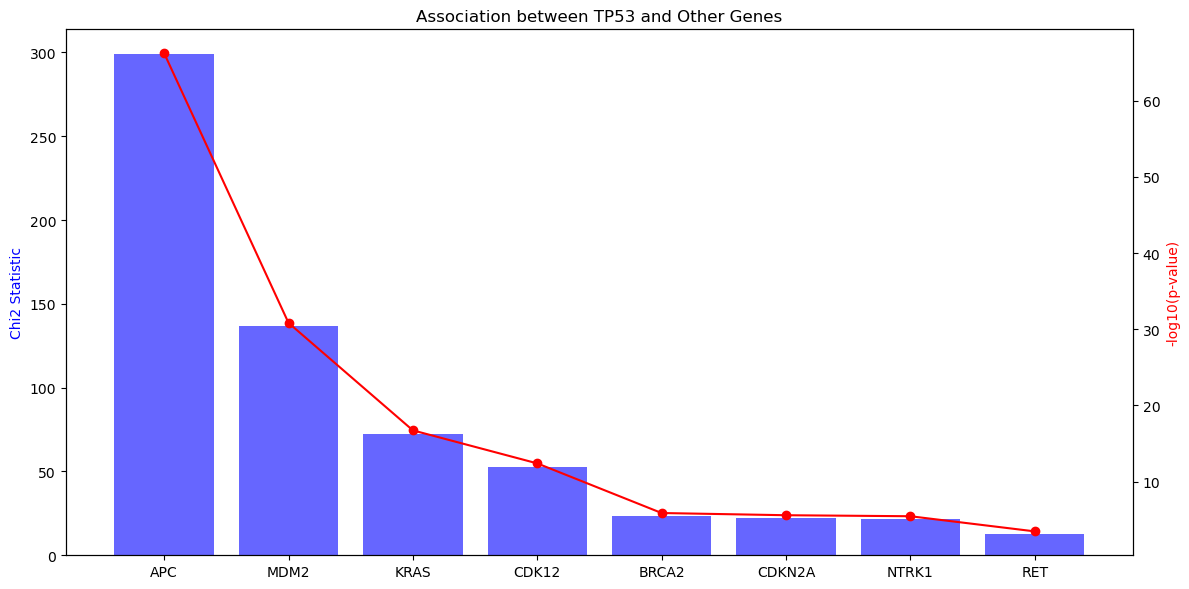

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
genes = ['APC', 'MDM2', 'KRAS', 'CDK12', 'BRCA2', 'CDKN2A', 'NTRK1', 'RET']
chi2_values = [298.828787, 136.638081, 72.312439, 52.667282, 23.438486, 22.160113, 21.573750, 12.892266]
p_values = [5.928446e-67, 1.446937e-31, 1.836859e-17, 3.951187e-13, 1.289724e-06, 2.508312e-06, 3.404800e-06, 3.299427e-04]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Twin the axes
ax2 = ax1.twinx()

# Plot data
ax1.bar(genes, chi2_values, color='blue', alpha=0.6, label='Chi2 Statistic')
ax2.plot(genes, -np.log10(p_values), color='red', marker='o', label='-log10(p-value)')

# Set the y axis labels
ax1.set_ylabel('Chi2 Statistic', color='blue')
ax2.set_ylabel('-log10(p-value)', color='red')

# To make the graph more interpretable, we use -log10 of the p-value.
# Smaller p-values will result in larger -log10(p-value), emphasizing the significance.

# Set title
plt.title('Association between TP53 and Other Genes')

# Show the plot
plt.tight_layout()
plt.show()


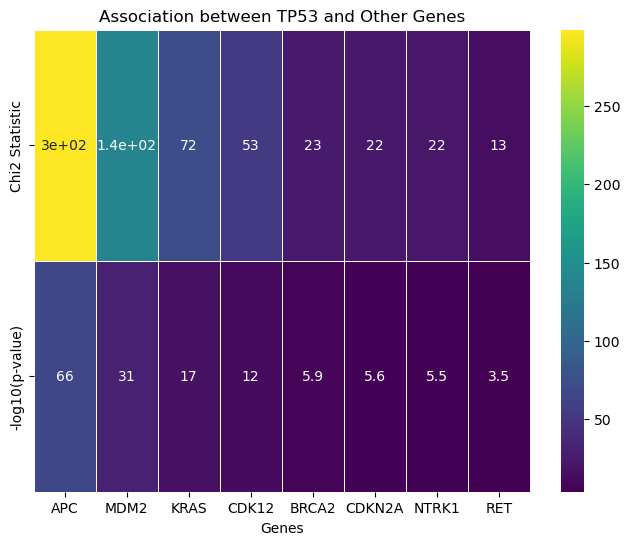

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Provided data
genes = ['APC', 'MDM2', 'KRAS', 'CDK12', 'BRCA2', 'CDKN2A', 'NTRK1', 'RET']
chi2_values = [298.828787, 136.638081, 72.312439, 52.667282, 23.438486, 22.160113, 21.573750, 12.892266]
p_values = [5.928446e-67, 1.446937e-31, 1.836859e-17, 3.951187e-13, 1.289724e-06, 2.508312e-06, 3.404800e-06, 3.299427e-04]

# Creating a dataframe to hold the data for easier heatmap plotting
df = pd.DataFrame({
    'Genes': genes,
    'Chi2 Statistic': chi2_values,
    '-log10(p-value)': -np.log10(p_values)
})

# Setting up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.set_index('Genes').T, cmap='viridis', annot=True, linewidths=.5)

# Setting title and showing the heatmap
plt.title('Association between TP53 and Other Genes')
plt.show()
